<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [5]:
df["JobSat"] = df["JobSat"].fillna("No Response")
df["RemoteWork"] = df["RemoteWork"].fillna("Unknown")

print(df[['JobSat', 'RemoteWork']].isnull().sum())

JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here
print(df['JobSat'].unique())

['No Response' 8.0 5.0 10.0 6.0 9.0 4.0 7.0 3.0 2.0 1.0 0.0]


In [7]:
# --- 1. Convert YearsCodePro to numeric ---
def convert_years(x):
    if pd.isna(x):
        return None
    if x == "Less than 1 year":
        return 0
    elif x == "More than 50 years":
        return 50
    else:
        try:
            return float(x)
        except:
            return None

df["YearsCodePro"] = df["YearsCodePro"].apply(convert_years)

# --- 2. Ensure JobSatScore is numeric ---
df["JobSatScore"] = pd.to_numeric(df["JobSat"], errors="coerce")

# --- 3. Create experience ranges ---
bins = [0, 5, 10, 20, 50]
labels = ["0-5", "5-10", "10-20", "20+"]
df["ExperienceRange"] = pd.cut(
    df["YearsCodePro"], 
    bins=bins, 
    labels=labels, 
    right=False
)

# --- 4. Calculate median satisfaction per range ---
median_satisfaction = df.groupby("ExperienceRange", observed=True)["JobSatScore"].median()
print(median_satisfaction)


ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
20+      8.0
Name: JobSatScore, dtype: float64


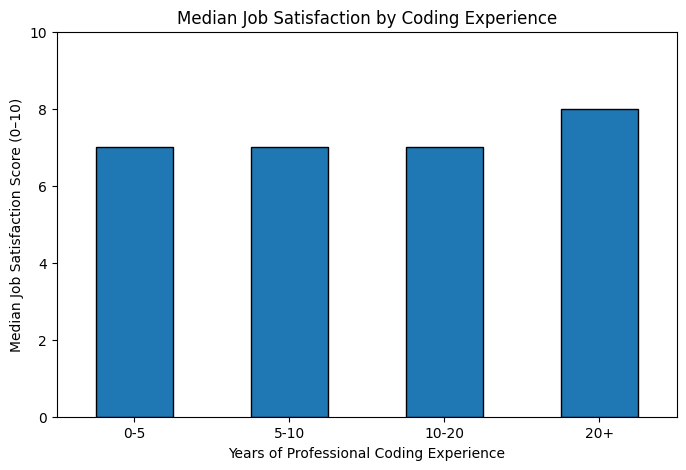

In [8]:
# --- 6. Plot ---
median_satisfaction.plot(
    kind="bar",
    figsize=(8,5),
    rot=0,
    edgecolor="black"
)

plt.title("Median Job Satisfaction by Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction Score (0–10)")
plt.ylim(0,10)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


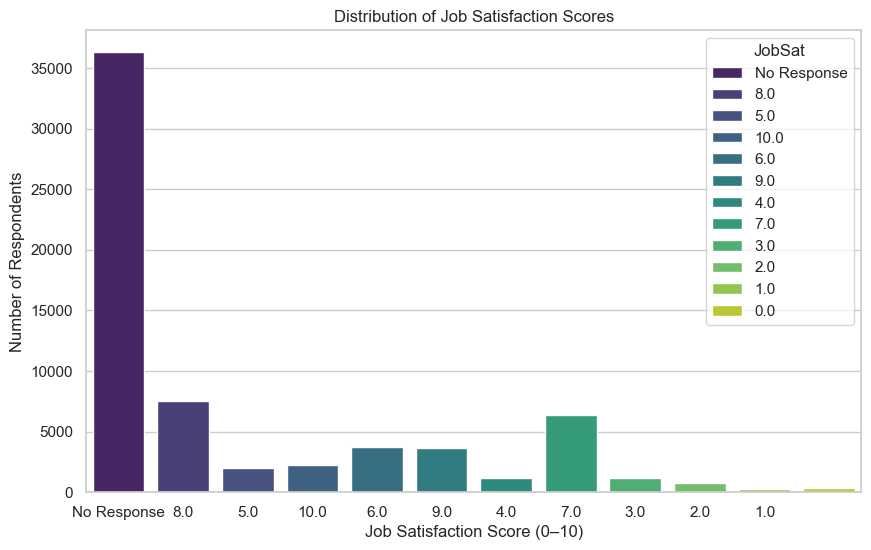

In [9]:
## Write your code here

# Set style
sns.set(style="whitegrid")

# Count plot
plt.figure(figsize=(10,6))
sns.countplot(x="JobSat", data=df, hue=df["JobSat"], palette="viridis")

plt.title("Distribution of Job Satisfaction Scores")
plt.xlabel("Job Satisfaction Score (0–10)")
plt.ylabel("Number of Respondents")
plt.xticks(range(0,11))
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [10]:
df["RemoteWork"].unique()

array(['Remote', 'Unknown', 'In-person',
       'Hybrid (some remote, some in-person)'], dtype=object)

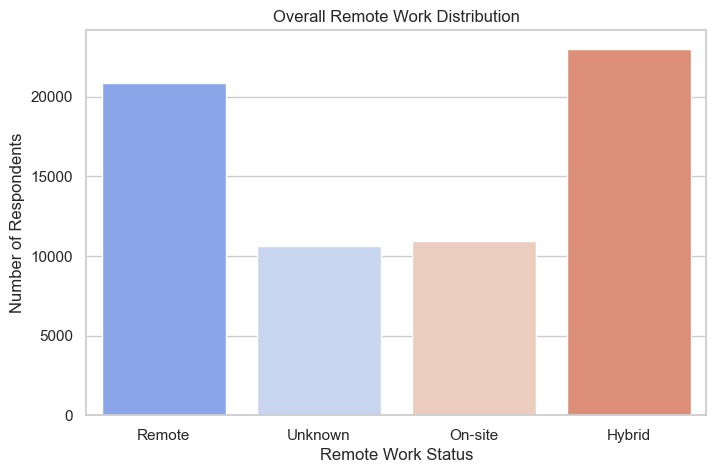

In [11]:
## Write your code here
remote_labels = {
    "Remote": "Remote",
    "Unknown": "Unknown",
    "In-person": "On-site",
    "Hybrid (some remote, some in-person)": "Hybrid"
}

# Apply mapping to a new column (safer than overwriting original)
df["RemoteWorkShort"] = df["RemoteWork"].map(remote_labels)

# Count plot using the short labels
plt.figure(figsize=(8,5))
sns.countplot(x="RemoteWorkShort", data=df,hue=df["RemoteWorkShort"],  palette="coolwarm")
plt.title("Overall Remote Work Distribution")
plt.xlabel("Remote Work Status")
plt.ylabel("Number of Respondents")
plt.show()

In [12]:
cross_tab_pct = pd.crosstab(
    df['Employment'], 
    df['RemoteWork'], 
    normalize='index'
) * 100 # Convert to percentage

print("\nCross-Tabulation (Percentage of Each Employment Type by Remote Status):")
print(cross_tab_pct.round(1))


Cross-Tabulation (Percentage of Each Employment Type by Remote Status):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 44.3   
Employed, full-time;Employed, part-time                                             40.1   
Employed, full-time;Independent contractor, fre...                                  37.4   
Employed, full-time;Independent contractor, fre...                                  43.5   
Employed, full-time;Independent contractor, fre...                                   0.0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                  57.1   
Student, full-time;Student, part-time;Retired                                        0.0   
Student

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Top languages in the US:
 LanguagesList
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
TypeScript                 4173
C#                         3112
Java                       2949
C++                        2607
C                          2225
Name: count, dtype: int64


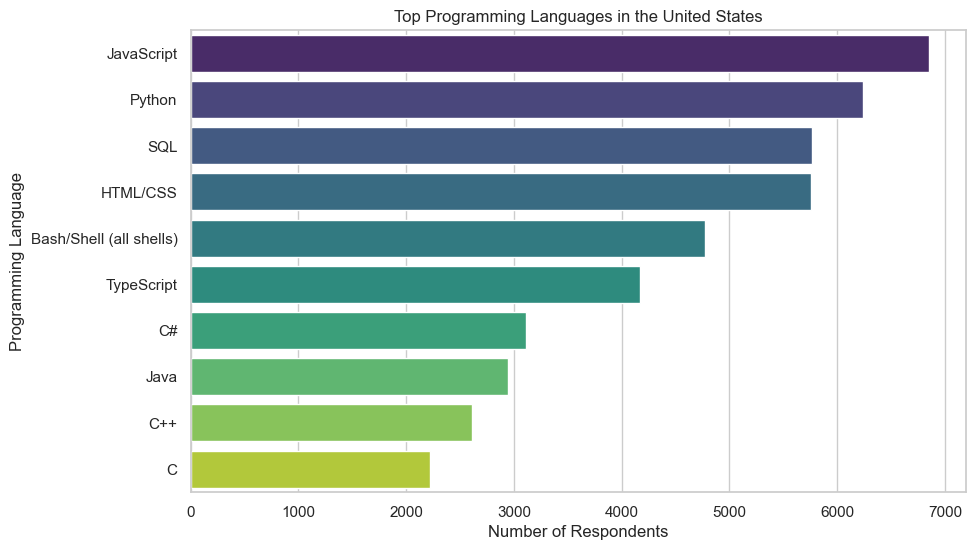

In [13]:
## Write your code here

# --- 1. Drop rows with missing language or country and make a copy ---
df_languages = df.dropna(subset=["LanguageHaveWorkedWith", "Country"]).copy()

# --- 2. Split semicolon-separated languages and explode ---
df_languages["LanguagesList"] = df_languages["LanguageHaveWorkedWith"].str.split(";")
df_languages = df_languages.explode("LanguagesList")
df_languages["LanguagesList"] = df_languages["LanguagesList"].str.strip()  # remove extra spaces

# --- 3. Filter by country or region (example: United States) ---
df_us = df_languages[df_languages["Country"] ==  "United States of America"]

# --- 4. Count top languages in that region ---
lang_counts = df_us["LanguagesList"].value_counts().head(10)
print("Top languages in the US:\n", lang_counts)

# --- 5. Visualize top languages with a horizontal bar plot ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=lang_counts.values, 
    y=lang_counts.index, 
    hue=lang_counts.index,   # use index as hue
    palette="viridis",
    dodge=False,             # needed for single bars per category
    legend=False
)

plt.title("Top Programming Languages in the United States")
plt.xlabel("Number of Respondents")
plt.ylabel("Programming Language")
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.



Pearson Correlation (r) between Years of Experience and Job Satisfaction: -0.028


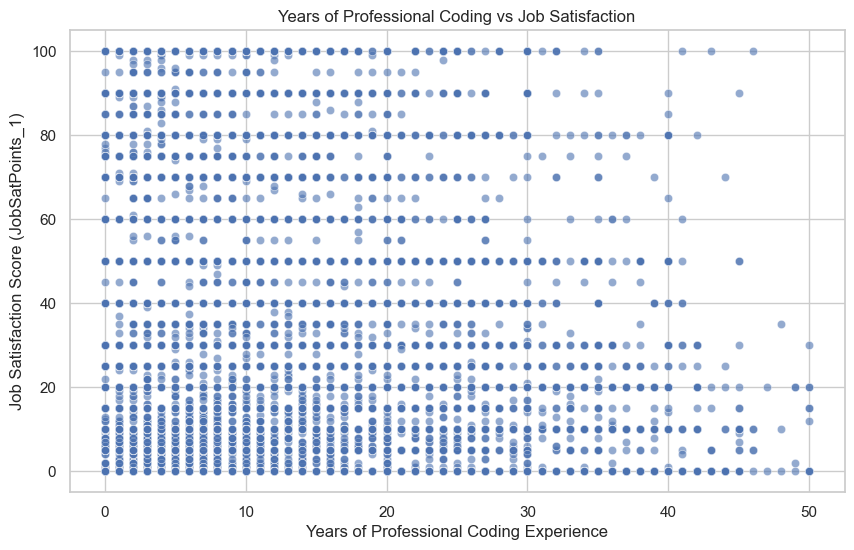

In [14]:
## Write your code here

# --- 1. Drop rows with missing values in either column ---
    
df_exp_js = df.dropna(subset=["YearsCodePro", "JobSatPoints_1"]).copy()

# --- 2. Convert YearsCodePro to numeric ---
def convert_years(x):
    if x == "Less than 1 year":
        return 0
    elif x == "More than 50 years":
        return 50
    else:
        try:
            return float(x)
        except:
            return None

df_exp_js["YearsCodePro"] = df_exp_js["YearsCodePro"].apply(convert_years)

# --- 3. Drop any remaining rows where conversion failed ---
df_exp_js = df_exp_js.dropna(subset=["YearsCodePro"])

# --- 3.5 Calculate Correlation Coefficient ---
correlation = df_exp_js["YearsCodePro"].corr(df_exp_js["JobSatPoints_1"])
print(f"\nPearson Correlation (r) between Years of Experience and Job Satisfaction: {correlation:.3f}")

# --- 4. Scatter plot ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="YearsCodePro", 
    y="JobSatPoints_1",
    data=df_exp_js,
    alpha=0.6 # Use alpha to show density
)
plt.title("Years of Professional Coding vs Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score (JobSatPoints_1)")
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [15]:
## Write your code here
# 1. Drop missing Employment or EdLevel
df_edu = df.dropna(subset=["Employment", "EdLevel"]).copy()

# 2. Split and explode Employment
df_edu["EmploymentList"] = df_edu["Employment"].str.split(";")
df_edu = df_edu.explode("EmploymentList")
df_edu["EmploymentList"] = df_edu["EmploymentList"].str.strip()  # remove extra spaces

# 3. Cross-tabulation with percentages
edu_emp_percent = pd.crosstab(
    df_edu["EdLevel"], 
    df_edu["EmploymentList"], 
    normalize="index"
) * 100

print(edu_emp_percent.round(1))

EmploymentList                                      Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                57.6   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       65.8   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    70.5   
Primary/elementary school                                          13.9   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     69.5   
Secondary school (e.g. American high school, Ge...                 24.8   
Some college/university study without earning a...                 46.1   
Something else                                                     39.8   

EmploymentList                                      Employed, part-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 6.3   
Bachelor’s degree (B.A.,

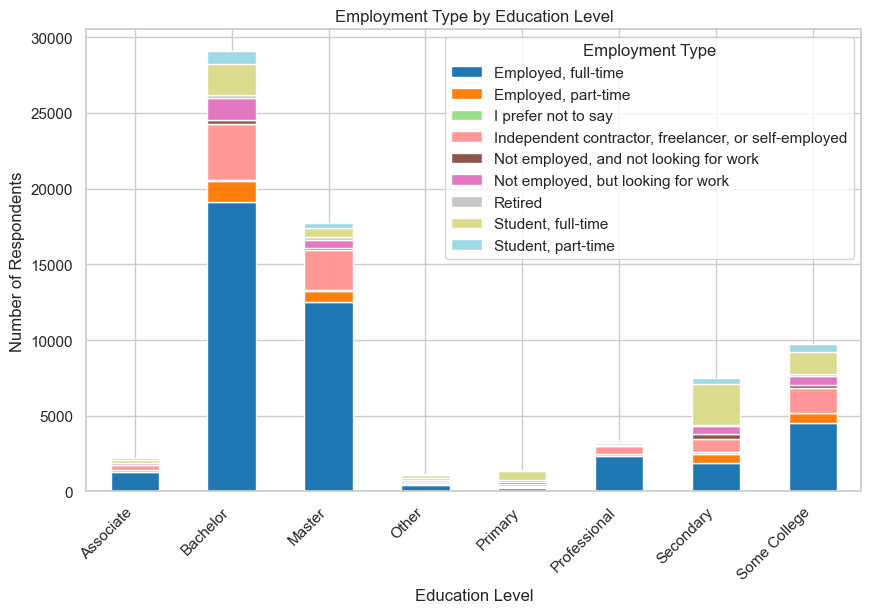

In [16]:
# Map long education levels to short labels
edu_short = {
    "Primary/elementary school": "Primary",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Some college/university study without earning a degree": "Some College",
    "Something else": "Other"
}

# Apply mapping to a new column for plotting
df_edu["EdLevelShort"] = df_edu["EdLevel"].map(edu_short)

edu_emp_counts = pd.crosstab(df_edu["EdLevelShort"], df_edu["EmploymentList"])

edu_emp_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)
plt.title("Employment Type by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Employment Type")
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [17]:
## Write your code here
df.to_csv("survey_full.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
